# <i><span style="color:green;"><center>Plant Growth Data Classification</center></span></i>

## <u><span style="color:red;">Problem Statement</span></u>
<span style="font-size: 15px;font-family: 'Times New Roman';"><i> Farmers need to determine the most suitable crops for their soil based on its nutrient levels (nitrogen, phosphorus, and potassium), temperature, and pH. The goal is to optimize agricultural yield by matching soil conditions to the nutrient needs of specific crops.</i></span>

## <u><span style="color:#6F4E37;">Objective</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';"><b><i>Build a machine learning model that predicts the best crops for given soil conditions and supports farmers in making data-driven decisions.</i><b></span>


## <u><span style="color:#000080;">Data Features:</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';">
<b>Nutrient levels:</b> Nitrogen (N), Phosphorus (P), Potassium (K).<br>
<b>Soil properties:</b> Average temperature and pH (acidity/basicity).<br>
<b>Target:</b> Crop types (e.g., rice, maize, legumes, fruits, cash crops).</span>span>

## <u><span style="color:goldenrod;">Goals:</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';">
<b>Analyze Soil Needs:</b> Study nutrient, temperature, and pH requirements for various crops.<br>
<b>Develop Predictive Model:</b> Train a classification model to recommend crops based on soil conditions.<br>
<b>Evaluate Performance:</b> Validate the model to ensure high accuracy in crop recommendations.<br>
<b>Suggest Improvements:</b> Use the model to advise on soil amendments or crop rotation strategies to enhance suitability for specific crops.<br></span>

## <u><span style="color:#902C3E;">Impact:</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';">
* Helps farmers choose the right crops for their soil conditions.<br>
* Supports sustainable farming practices by promoting efficient resource use.<br>
* Enhances agricultural productivity and decision-making.</span>

#### Loading Necessary Libraries and Importing the Dataset

In [154]:
# OS module to interact with the operating system
import os

# Getting the current working directory
os.getcwd()

# numerical computations and data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Applying the default seaborn theme for plots

# Ensuring that plots are displayed inline in Jupyter notebooks
%matplotlib inline

# machine learning utilities from sklearn
from sklearn import model_selection  # For splitting the dataset and cross-validation
from sklearn import preprocessing  # For data preprocessing like scaling and encoding

# pipeline utility for combining preprocessing and modeling steps
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# classifiers from sklearn
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# metrics to evaluate model performance
from sklearn.metrics import confusion_matrix  # For generating confusion matrix
from sklearn.metrics import classification_report  # For detailed classification metrics
from sklearn.metrics import accuracy_score  # For calculating accuracy
from sklearn.model_selection import GridSearchCV
# Suppressing warnings for clean output
import warnings
warnings.filterwarnings("ignore")


In [9]:
df = pd.read_csv("Plan_Growth_recommendation.csv")

#### Data Structure Inspection

In [11]:
# First few records
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
# last few records
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [13]:
# No of rows and cols 
df.shape

(2200, 8)

In [14]:
# Basic Information of dataset
# Verified all the features have  correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [15]:
# Statistical Summary of dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


##### Description insights
<span style="font-size: 15px; font-family: 'Times New Roman';"> 
* No null values<br>
* N (Nitrogen):<br>
    Range: 0 to 140<br>
    Distribution :The min value is 0 and mean higher than 50 percentile so there is positive skew<br>
* P (Phosphorus):<br>
    Range: 5 to 145.<br>
    Distribution: The mean (~53.36) is closer to the 75th percentile (68.0), indicating a slight positive skew.<br>
* K (Potassium):<br>
    Range: 5 to 205. Higher range compared to N and P.<br>
    Distribution : high standard deviation and positive skewness in the distribution <br>
    This may indicates that the potassium levels in many samples deviate significantly from the average.<br>
* Temperature:<br>
    Range: 8.83 to 43.68.<br>
    Most values: Concentrated around the mean. mean~=meadian and small standard deviation<br>
* Humidity:<br>
    Range: 14.26 to 99.98.<br>
    Values are spread across a wide range beacause std~22<br>
* pH:<br>
    Range: 3.50 to 9.93.<br>
    Soil neutrality: Most soil pH values fall near neutral (pH 7), with some highly acidic (pH ~3.5) and basic (pH ~9.9) outliers.<br>
* Rainfall:<br>
    Range: 20.21 to 298.56. <br>
    High variation: Indicates a diverse range of rainfall conditions.std~ 54.9<br></span>

#### Data Cleaning

In [18]:
# Handling missing values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<span style="font-size: 15px; font-family: 'Times New Roman';"> There is no null values </span>

In [20]:
# Handling Duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

<span style="font-size: 15px; font-family: 'Times New Roman';"> There is no Duplicated values </span>

#### Exploratory Data Analysis (EDA)

In [23]:
# Handlind data Imbalance
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<span style="font-size: 15px; font-family: 'Times New Roman';"> The data is Balanced </span>

##### Data visualization

###### Univariate Analysis

In [41]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [43]:
def plot_univariate_analysis(df, column_name):
    """
    Function to create univariate analysis plots (Histogram, KDE, Boxplot)
    for a given column in the dataset.
    
    Parameters:
    df (DataFrame): The dataset containing the column.
    column_name (str): The column name to analyze.
    """
    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram with KDE
    sns.histplot(df[column_name], bins=20, kde=True, ax=axes[0], edgecolor="black", color="black")
    axes[0].set_title(f"{column_name} Histogram", fontsize=16)
    axes[0].set_xlabel(f"{column_name} Levels")
    axes[0].set_ylabel("Frequency")
    
    # KDE Plot
    sns.kdeplot(df[column_name], shade=True, color="orange", ax=axes[1])
    axes[1].set_title(f"{column_name} KDE Plot", fontsize=16)
    axes[1].set_xlabel(f"{column_name} Levels")
    axes[1].set_ylabel("Density")
    
    # Box Plot
    sns.boxplot(x=df[column_name], color="#ffb03b", ax=axes[2])
    axes[2].set_title(f"{column_name} Box Plot", fontsize=16)
    axes[2].set_xlabel(f"{column_name} Levels")
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()


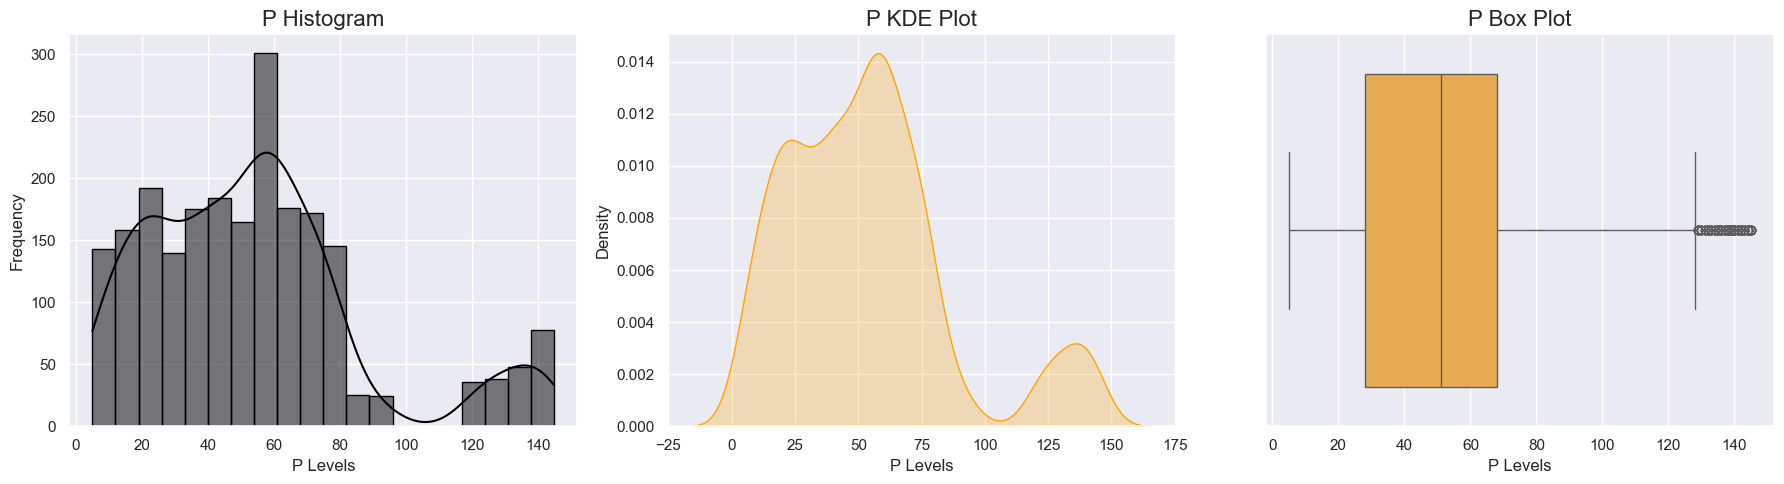

In [45]:
# Univariate analysis of phosphorus
plot_univariate_analysis(df, 'P')

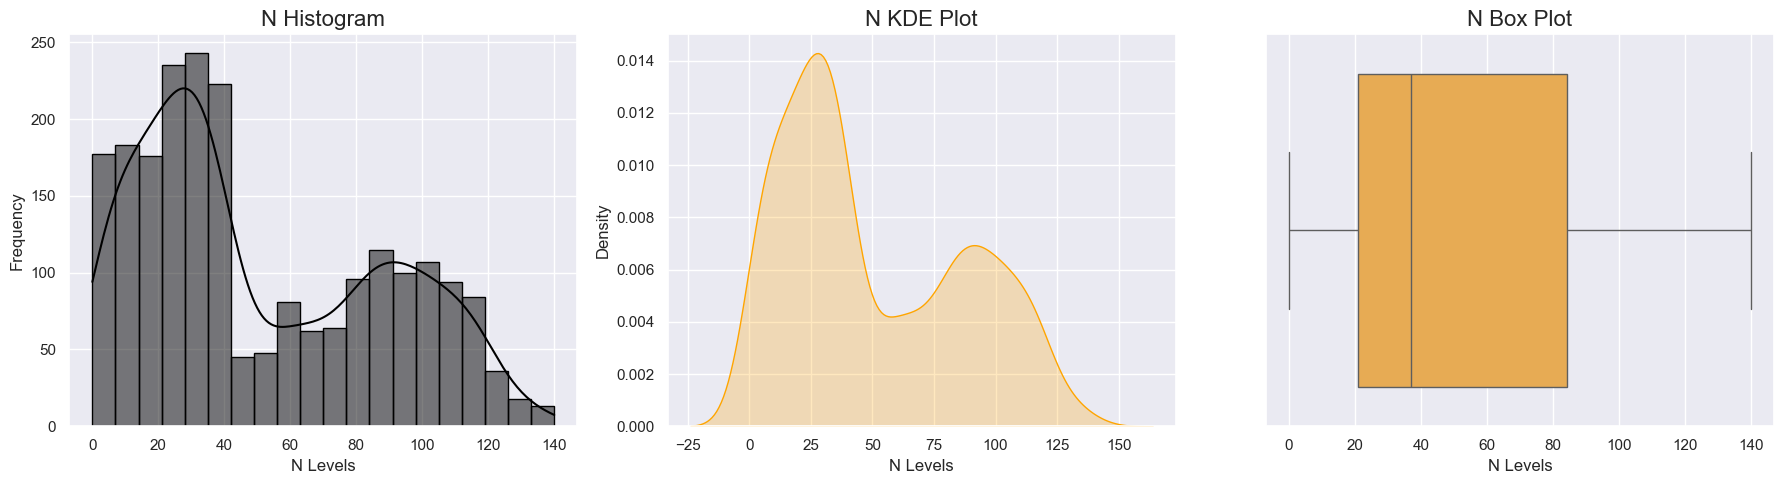

In [47]:
# Univariate analysis of Nitrogen
plot_univariate_analysis(df, 'N')

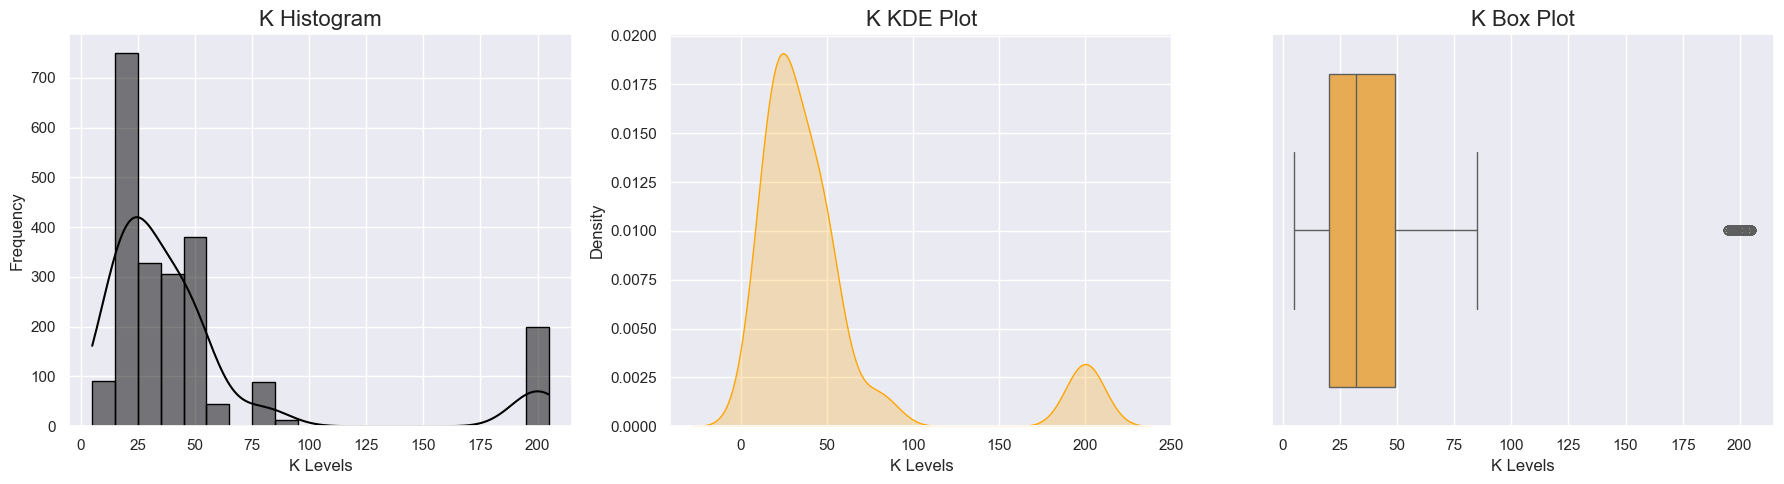

In [49]:
# Univariate analysis of potaassium
plot_univariate_analysis(df, 'K')

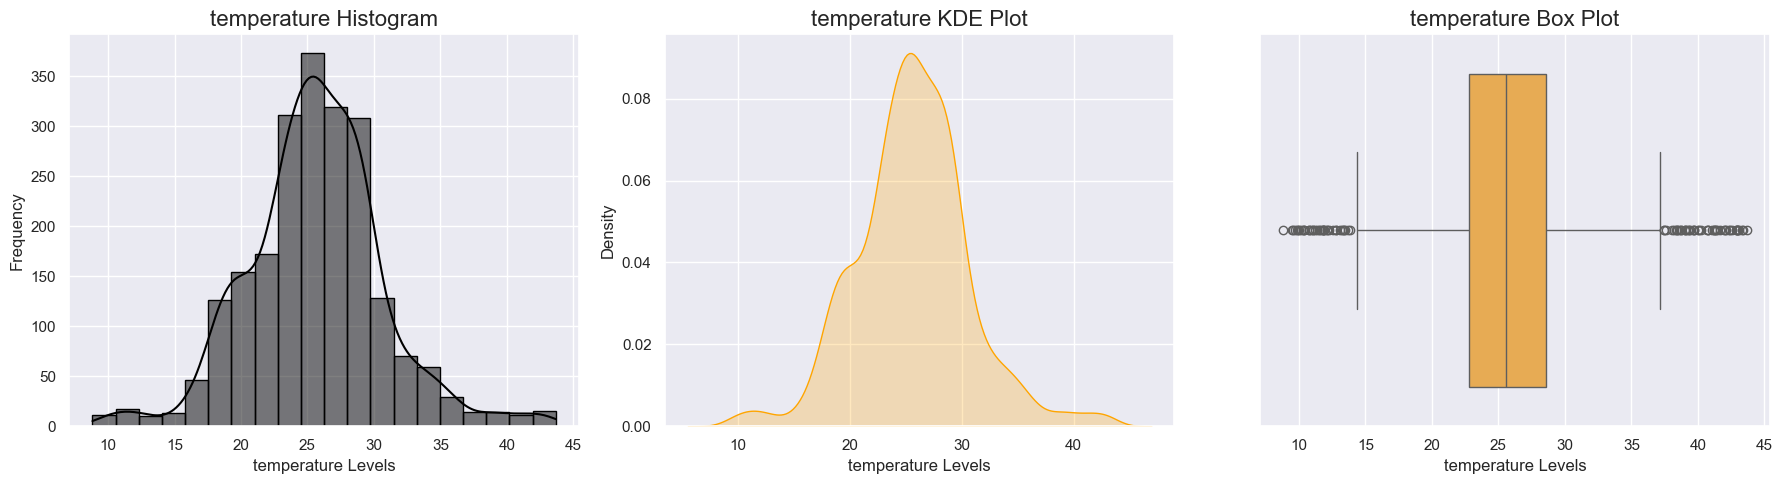

In [52]:
plot_univariate_analysis(df, 'temperature')

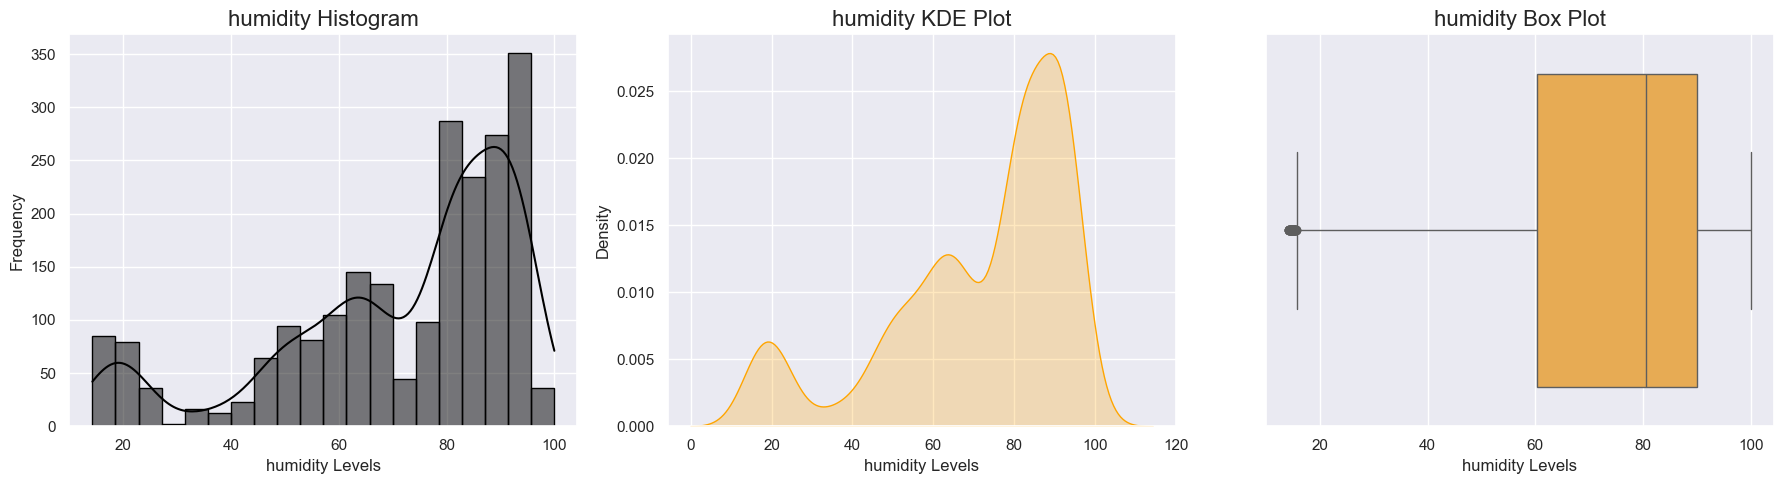

In [54]:
plot_univariate_analysis(df, 'humidity')

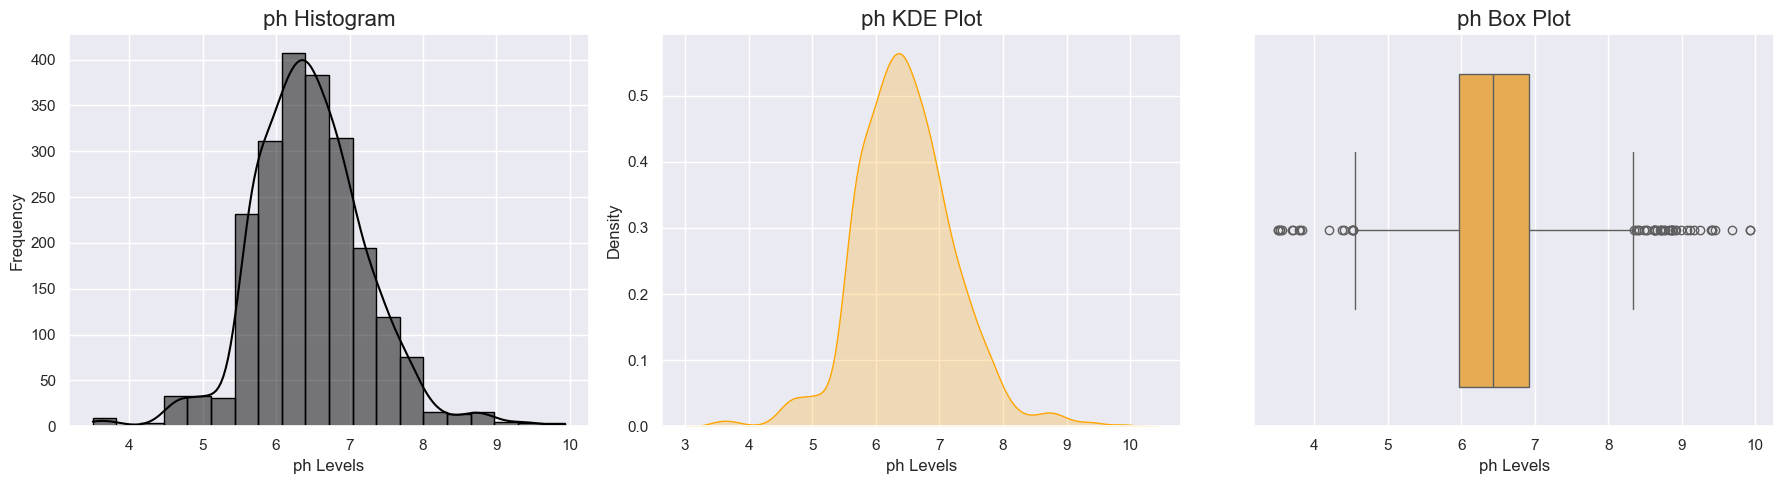

In [56]:
plot_univariate_analysis(df, 'ph')

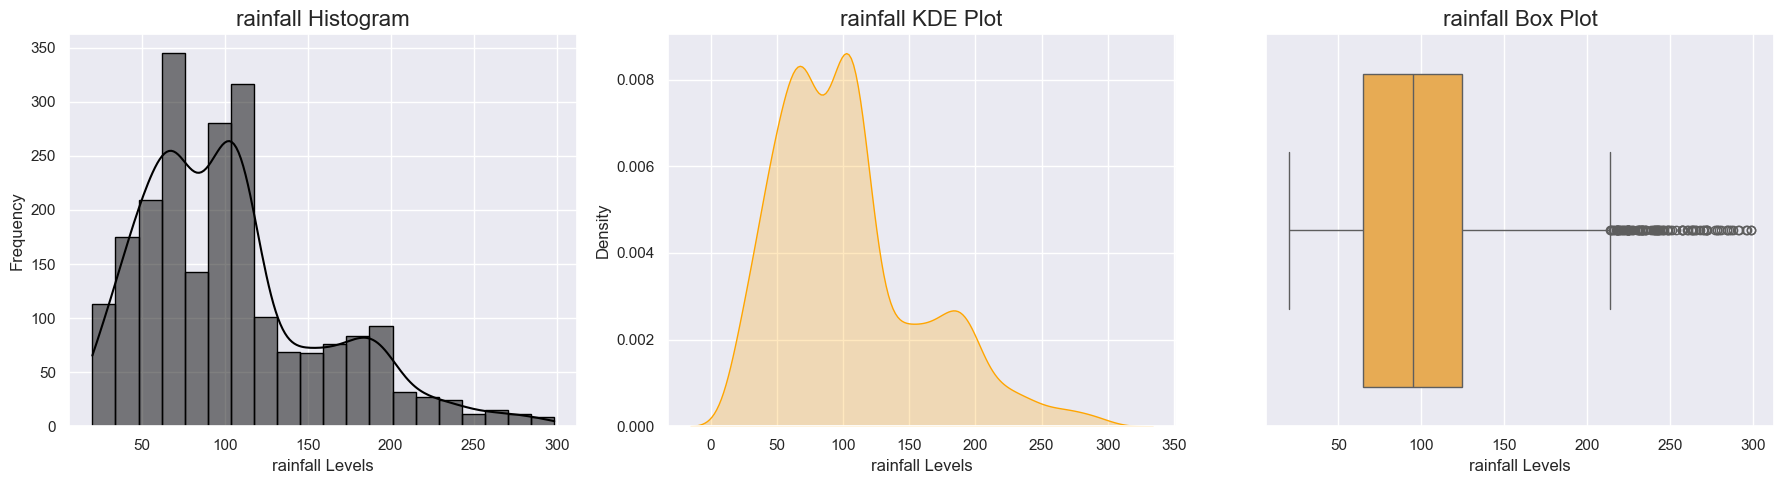

In [58]:
plot_univariate_analysis(df, 'rainfall')

###### Bivariate Analysis

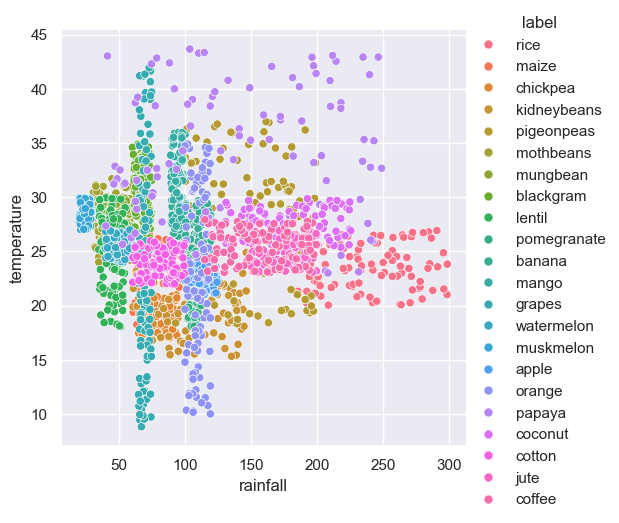

In [87]:
sns.relplot(x='rainfall',y='temperature',data=df,hue='label',kind='scatter',height=5)
plt.show()

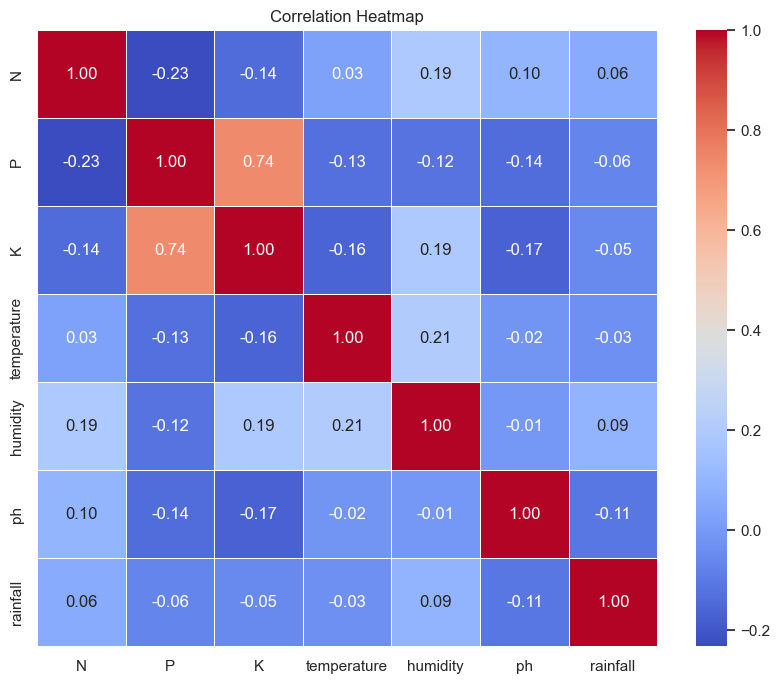

In [101]:
 corr = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
    
# Generate a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [89]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

###### Multivariate Analysis

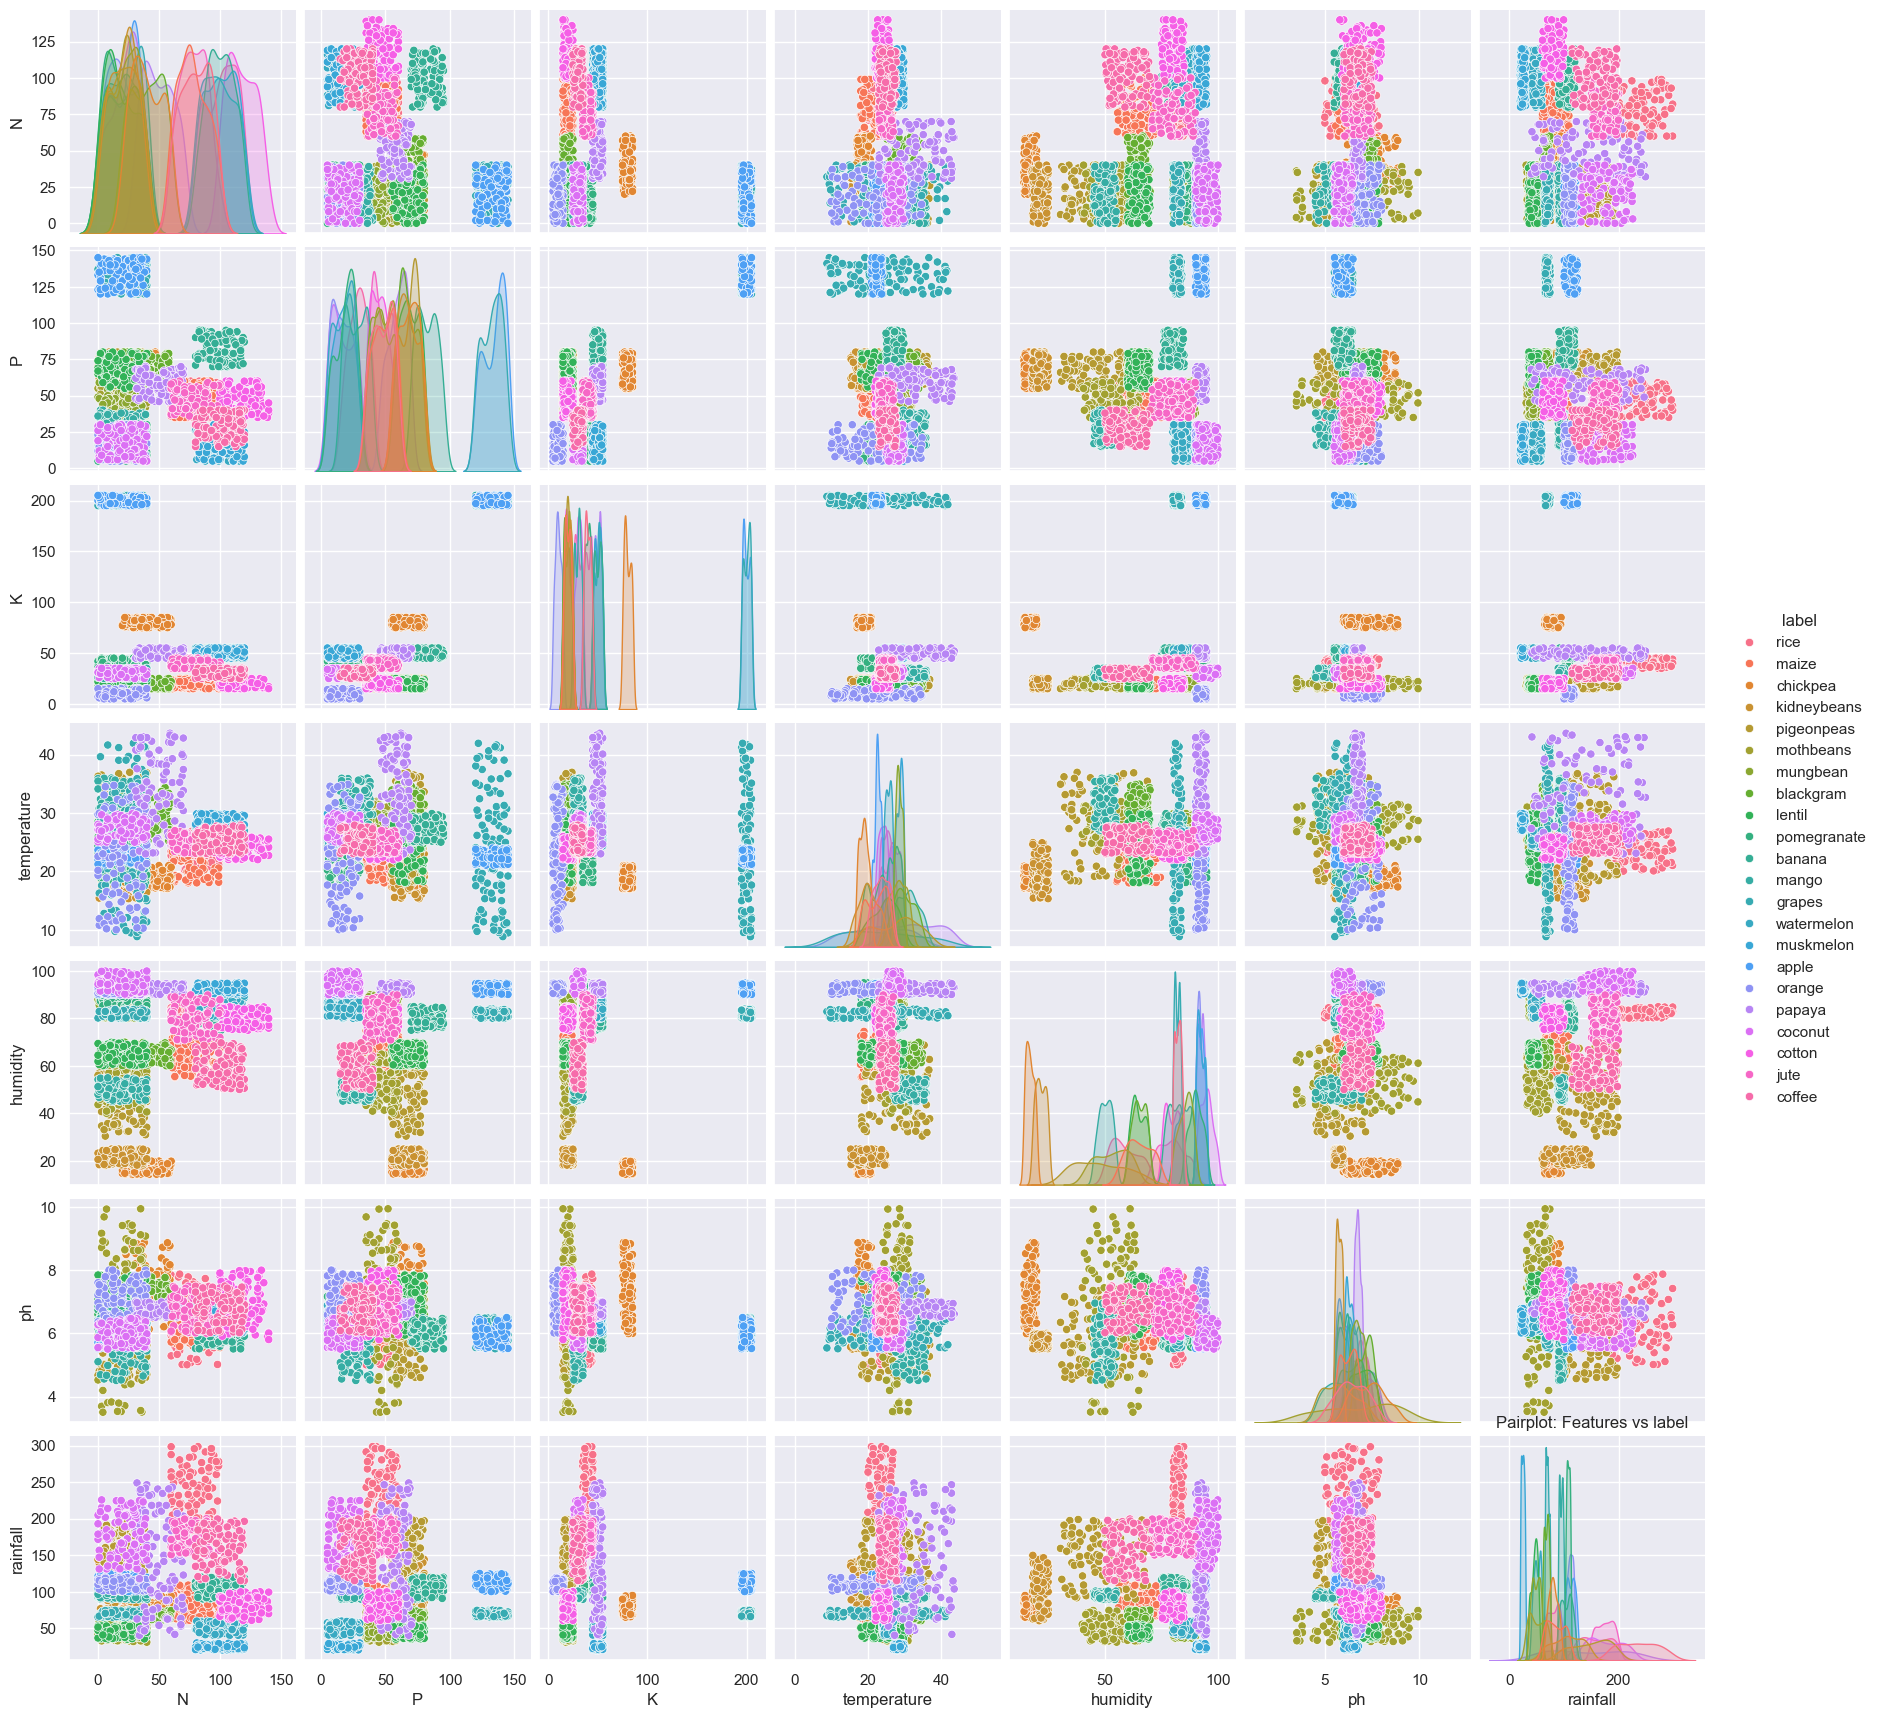

In [91]:
def pairplot(df, dependent_var, feature_list):
    """
    Perform bivariate analysis using pairplot (scatterplot matrix) for features vs dependent variable.
    
    Parameters:
    df (DataFrame): The dataset containing the variables.
    dependent_var (str): The dependent variable (categorical).
    feature_list (list): List of numerical features for comparison.
    """
    # Pairplot for the features against the dependent variable
    sns.pairplot(df[feature_list + [dependent_var]], hue=dependent_var, height=2.5)
    plt.title(f"Pairplot: Features vs {dependent_var}")
    plt.show()

# Example features and dependent variable
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
pairplot(df, 'label', features)


#### Feature Engineering and Preprocessing

###### spliting and transformation

In [137]:
x = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Independent variables
y = df['label']  # Dependent variable (categorical)
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [141]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform on the training data
x_test_scaled = scaler.transform(x_test)

#### Model Selection and Training

##### Using LogisticRegression

In [147]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
log_reg.fit(x_train_scaled, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(x_train_scaled)
# Predict on the test data
y_pred = log_reg.predict(x_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy = {train_accuracy}")
print(f"Test Accuracy= {test_accuracy}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Train Accuracy = 0.977840909090909
Test Accuracy= 0.9636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.0

##### Using Random Forest

In [172]:
fit_rf = RandomForestClassifier(random_state=35)
param_dict = {
    'max_depth':[2,3,4],
    'n_estimators': [100, 200, 300],
    'bootstrap':[True,False],
    'max_features':['auto','log2','sqrt'],
    'criterion':['gini','entropy']
}
cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dict,n_jobs=2)

In [174]:
cv_rf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=35), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [176]:
best_params = cv_rf.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}


In [178]:

# Set the best parameters in the original RandomForestClassifier using set_params
fit_rf.set_params(**best_params)

# Now, fit the model again with the best parameters
fit_rf.fit(x_train_scaled, y_train)

# Predict on the training and testing data
y_train_pred = fit_rf.predict(x_train_scaled)
y_test_pred = fit_rf.predict(x_test_scaled)

# Calculate accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Classification Report for Testing Data
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.9755681818181818
Testing Accuracy: 0.9704545454545455
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      0.61      0.76        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00 

<span style="font-size: 15px; font-family: 'Times New Roman';"> 
In this analysis, I built and evaluated two models: Logistic Regression and Random Forest.<br>

<b>Logistic Regression:</b><br>

* Performance: 96% accuracy<br>
* The model performed well with a high accuracy, indicating that the linear relationships in the data were effectively captured.<br>
<b>Random Forest:</b><br>

* Performance: 97% accuracy<br>
* The Random Forest model slightly outperformed Logistic Regression, benefiting from its ability to handle non-linear relationships and capture complex patterns in the data.<br></span>